In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
print(sklearn_version)
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

0.18.1


#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
print('Section: First steps with scikit-learn')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


Section: First steps with scikit-learn
Class labels: [0 1 2]


In [3]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02,
                          xlabel = 'petal length [cm]',ylabel='petal width [cm]',legend_log='upper left'):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            #warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(loc=legend_log)
        plt.show()


Perceptron

Section: Training a perceptron via scikit-learn
Y array shape (45,)
Misclassified samples: 4
Accuracy: 0.91


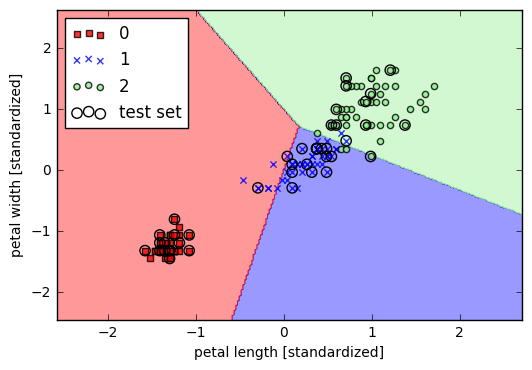

In [4]:
print('Section: Training a perceptron via scikit-learn')

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
print('Y array shape', y_test.shape)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150),
                      xlabel='petal length [standardized]',ylabel='petal width [standardized]',legend_log='upper left')


Decision Tree
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Section: Building a decision tree


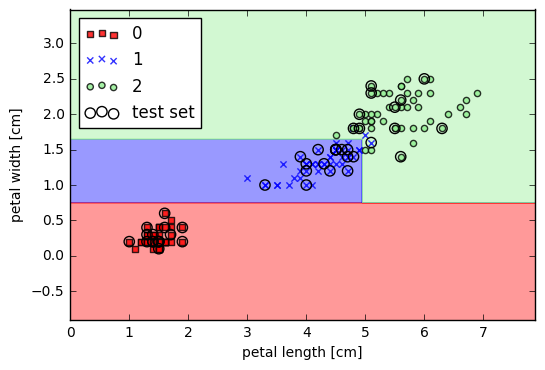

In [5]:
print('Section: Building a decision tree')

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105, 150))


Random Forest
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Section: Building a Random Forest


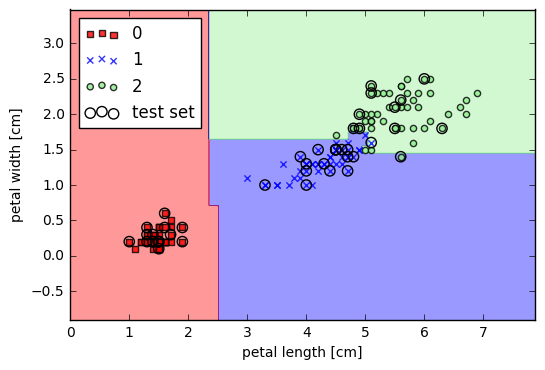

In [6]:
print('Section: Building a Random Forest')


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))


Gradient Boosted Decision Tree
#http://blog.csdn.net/zouxy09/article/details/48903179
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Section: Building a Gradient Boosting Decision Tree


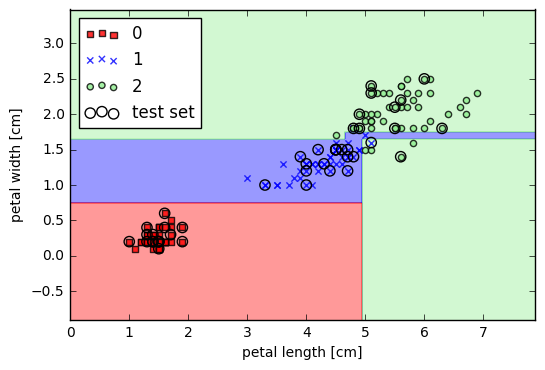

In [7]:
print('Section: Building a Gradient Boosting Decision Tree')

gbdt = GradientBoostingClassifier(n_estimators=100)  
gbdt.fit(X_train, y_train) 

plot_decision_regions(X_combined, y_combined,
                      classifier=gbdt, test_idx=range(105, 150))


SVM
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Section: Dealing with the nonlinearly separable case using slack variables


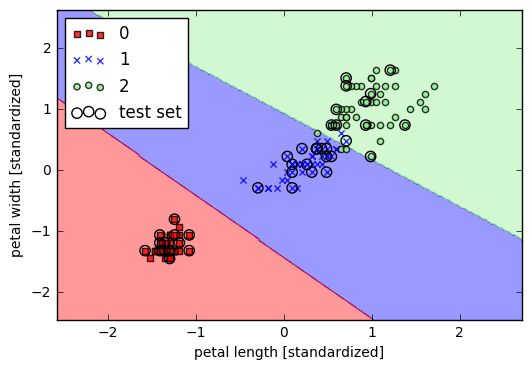

In [8]:
print('Section: Dealing with the nonlinearly '
      'separable case using slack variables')

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150),
                      xlabel='petal length [standardized]',ylabel='petal width [standardized]',legend_log='upper left')
